# NFL Historical Data for Simulation Bot

In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
sns.set_theme('notebook')

In [66]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [4]:
#read in nfl data files
dst_df = pd.read_csv("data/nfl_dst_raw_data.csv")
passrush_df = pd.read_csv("data/nfl_pass_rush_receive_raw_data.csv")
kicking_df = pd.read_csv("data/nfl_kicking_raw_data.csv")

/var/folders/80/rkdybljd1sz7w37r3nrwjnqw0000gn/T/ipykernel_52583/2094183706.py:3: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  passrush_df = pd.read_csv("data/nfl_pass_rush_receive_raw_data.csv")


Let's merge the dataframes together based on the `game_id` column

In [54]:
cols_to_use = dst_df.columns.difference(passrush_df.columns).to_list()
cols_to_use.append("game_id")
full_df = pd.merge(passrush_df, dst_df[cols_to_use], how='left', on=['game_id'])

In [56]:
cols_to_use = kicking_df.columns.difference(full_df.columns).to_list()
cols_to_use.append("game_id")
full_df = pd.merge(full_df, kicking_df[cols_to_use], how='left', on=['game_id'])

In [74]:
grouped_df = full_df.groupby(by=['game_id', 'team', 'player_id']).first().reset_index()

In [81]:
def get_team_points(row):
    if row['team'] == row['home_team']: return row['home_score']
    return row['vis_score']

In [88]:
grouped_df['points'] = grouped_df.apply(lambda row: row['home_score'] if row['home_team'] == row['team'] else row['vis_score'], axis=1)
grouped_df['points_allwed'] = grouped_df.apply(lambda row: row['home_score'] if row['home_team'] != row['team'] else row['vis_score'], axis=1)

In [152]:
grouped_df['game_dt'] = pd.to_datetime(grouped_df['game_date'], format = "%Y-%m-%d")

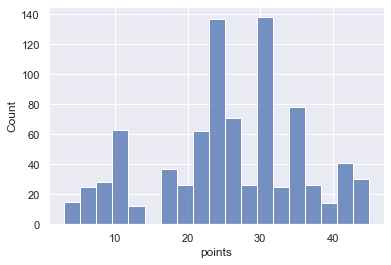

In [153]:
gb_data = grouped_df.loc[grouped_df['team'] == 'GNB']
ax = sns.histplot(data=gb_data, x='points')

In [154]:
#melt the df on the date column
gb_data = grouped_df[grouped_df['team'] == 'GNB']
melted_df = gb_data[['game_dt', 'points', 'points_allwed']].melt('game_dt', var_name='type_of_points', value_name='points_scored')
melted_df

,game_dt,type_of_points,points_scored
0,2019-09-05,points,10
1,2019-09-05,points,10
2,2019-09-05,points,10
3,2019-09-05,points,10
4,2019-09-05,points,10
...,...,...,...
1703,2022-12-04,points_allwed,19
1704,2022-12-04,points_allwed,19
1705,2022-12-04,points_allwed,19
1706,2022-12-04,points_allwed,19


In [179]:
melted_df.head(20)

,game_dt,type_of_points,points_scored
0,2019-09-05,points,10
1,2019-09-05,points,10
2,2019-09-05,points,10
3,2019-09-05,points,10
4,2019-09-05,points,10
5,2019-09-05,points,10
6,2019-09-05,points,10
7,2019-09-05,points,10
8,2019-09-05,points,10
9,2019-09-05,points,10


In [182]:
melted_df.drop_duplicates(inplace=True)

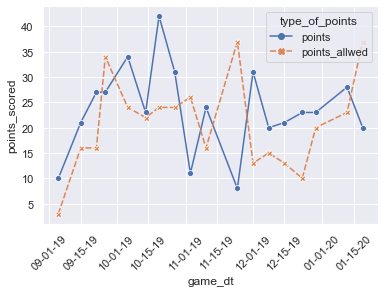

In [187]:
ax = sns.lineplot(data=melted_df[(melted_df['game_dt'] >= '09-01-2019') & (melted_df['game_dt'] <= '01-31-2020')], x='game_dt', y='points_scored', hue='type_of_points', style="type_of_points", markers=True)
ax.tick_params(axis='x', rotation=45)
# x_ticks = [tick for tick in ax.get_xticklabels()]
# print(x_ticks)
# x_dates = melted_df['game_dt'].dt.strftime('%Y-%m-%d').sort_values().unique()
# ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
# date_form = DateFormatter("%Y-%m")
# ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# ax.xaxis.set_major_formatter(date_form)
# mdates.MonthLocator(interval=1)
# ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(DateFormatter("%m-%d-%y"))